<a href="https://colab.research.google.com/github/pablex72/time-series-crop/blob/main/harmonic_with_csv_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     522.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          5.81e-224
Time:                        03:54:56   Log-Likelihood:                 622.77
No. Observations:                 325   AIC:                            -1202.
Df Residuals:                     303   BIC:                            -1118.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time          -0.6180      0.027    -22.655      0.0

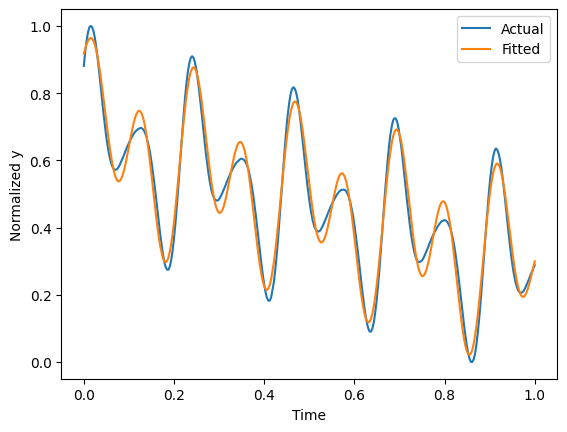

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the data from a CSV file
df = pd.read_csv('fitted.csv')

# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')

# Normalize the data using min-max normalization
df['time'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())

# Add harmonic terms as independent variables
harmonics = 10  # Number of harmonic terms to include
for i in range(1, harmonics + 1):
    df['cos{}'.format(i)] = np.cos(i * df['time'] * 2 * np.pi)
    df['sin{}'.format(i)] = np.sin(i * df['time'] * 2 * np.pi)

# Add constant term
df['constant'] = 1

# Perform the linear regression
X = df.drop(['date', 'y'], axis=1)
y = df['y']
model = sm.OLS(y, X)
results = model.fit()

# Print the model summary
print(results.summary())

# Predict the fitted values
fitted_values = results.predict(X)

# Plot the actual data and the fitted values
plt.plot(df['time'], df['y'], label='Actual')
plt.plot(df['time'], fitted_values, label='Fitted')
plt.xlabel('Time')
plt.ylabel('Normalized y')
plt.legend()
plt.show()
